In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('C:/Users/khadi/Downloads/GenAI - Sheet1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Company                              9 non-null      object
 1   Fiscal Year                          9 non-null      int64 
 2   Total Revenue                        9 non-null      object
 3   Net Income                           9 non-null      object
 4   Total Assets                         9 non-null      object
 5   Total Liabilities                    9 non-null      object
 6   Cash Flow from Operating Activities  9 non-null      object
dtypes: int64(1), object(6)
memory usage: 636.0+ bytes


In [30]:
df.head(9)

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2024,"245,122,000,000","88,136,000,000","512,163,000,000","243,686,000,000","18,315,000,000"
1,Microsoft,2023,"211,915,000,000","72,361,000,000","411,976,000,000","205,753,000,000","34,704,000,000"
2,Microsoft,2022,"198,270,000,000","72,738,000,000","364,840,000,000","198,298,000,000","13,931,000,000"
3,Tesla,2024,"97,690,000,000","7,153,000,000","122,070,000,000","48,390,000,000","14,923,000,000"
4,Tesla,2023,"96,773,000,000","14,974,000,000","106,618,000,000","43,009,000,000","13,256,000,000"
5,Tesla,2022,"81,462,000,000","12,587,000,000","82,338,000,000","36,440,000,000","14,724,000,000"
6,Apple,2024,"7,700,000,000","93,736,000,000","364,980,000,000","308,030,000,000","118,254,000,000"
7,Apple,2023,"8,200,000,000","96,995,000,000","352,583,000,000","290,437,000,000","110,543,000,000"
8,Apple,2022,"7,500,000,000","99,803,000,000","352,755,000,000","302,083,000,000","122,151,000,000"


In [ ]:
#Using pandas to calculate year-over-year changes for each financial metric. 

In [31]:
df = df.sort_values(by=['Company', 'Fiscal Year'])

In [7]:
#converting

In [32]:
financial_columns = [
    'Total Revenue',
    'Net Income',
    'Total Assets',
    'Total Liabilities',
    'Cash Flow from Operating Activities'
]

# Remove commas and convert to numeric 
for col in financial_columns:
    df[col] = df[col].replace({',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
#creating new columns that represent the yearly percentage change.

In [33]:
df = df.sort_values(by=['Company', 'Fiscal Year'])

df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Asset Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liability Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

In [34]:
df[['Company', 'Fiscal Year', 'Revenue Growth (%)', 'Net Income Growth (%)', 'Asset Growth (%)', 'Liability Growth (%)', 'Cash Flow Growth (%)']].head(10)

,Company,Fiscal Year,Revenue Growth (%),Net Income Growth (%),Asset Growth (%),Liability Growth (%),Cash Flow Growth (%)
8,Apple,2022,NaN,NaN,NaN,NaN,NaN
7,Apple,2023,9.333333,-2.813543,-0.048759,-3.855232,-9.502992
6,Apple,2024,-6.097561,-3.359967,3.516052,6.057424,6.975566
2,Microsoft,2022,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2023,6.882030,-0.518299,12.919636,3.759493,149.113488
0,Microsoft,2024,15.669962,21.800417,24.318650,18.436183,-47.225104
5,Tesla,2022,NaN,NaN,NaN,NaN,NaN
4,Tesla,2023,18.795267,18.964010,29.488207,18.026894,-9.970117
3,Tesla,2024,0.947578,-52.230533,14.492862,12.511335,12.575438


In [13]:
#average growth over the ye ars

In [35]:
avg_growth = df.groupby('Company')[
    ['Revenue Growth (%)', 'Net Income Growth (%)', 'Asset Growth (%)', 
     'Liability Growth (%)', 'Cash Flow Growth (%)']
].mean()

print(avg_growth)

           Revenue Growth (%)  Net Income Growth (%)  Asset Growth (%)  \
Company                                                                  
Apple                1.617886              -3.086755          1.733646   
Microsoft           11.275996              10.641059         18.619143   
Tesla                9.871422             -16.633261         21.990535   

           Liability Growth (%)  Cash Flow Growth (%)  
Company                                                
Apple                  1.101096             -1.263713  
Microsoft             11.097838             50.944192  
Tesla                 15.269114              1.302660  


In [ ]:
#average growth over the years in round figures

In [36]:
avg_growth = df.groupby('Company')[
    ['Revenue Growth (%)', 'Net Income Growth (%)', 'Asset Growth (%)', 
     'Liability Growth (%)', 'Cash Flow Growth (%)']
].mean().round()

print(avg_growth)

           Revenue Growth (%)  Net Income Growth (%)  Asset Growth (%)  \
Company                                                                  
Apple                     2.0                   -3.0               2.0   
Microsoft                11.0                   11.0              19.0   
Tesla                    10.0                  -17.0              22.0   

           Liability Growth (%)  Cash Flow Growth (%)  
Company                                                
Apple                       1.0                  -1.0  
Microsoft                  11.0                  51.0  
Tesla                      15.0                   1.0  


In [15]:
#is the total revenue across the industry is increasing or decreasing annually?

In [16]:
total_revenue_by_year = df.groupby('Fiscal Year')['Total Revenue'].sum()

print(total_revenue_by_year)

Fiscal Year
2022    287232000000
2023    316888000000
2024    350512000000
Name: Total Revenue, dtype: int64


In [17]:
#the company with the highest net income per year

In [18]:
idx = df.groupby('Fiscal Year')['Net Income'].idxmax()
top_earners = df.loc[idx, ['Company', 'Fiscal Year', 'Net Income']]

print(top_earners)

  Company  Fiscal Year   Net Income
8   Apple         2022  99803000000
7   Apple         2023  96995000000
6   Apple         2024  93736000000


In [19]:
#Apple's year-to-year performance

In [20]:
apple_trend = df[df['Company'] == 'Apple']
print(apple_trend[['Fiscal Year', 'Total Revenue', 'Net Income', 'Revenue Growth (%)']])

   Fiscal Year  Total Revenue   Net Income  Revenue Growth (%)
8         2022     7500000000  99803000000                 NaN
7         2023     8200000000  96995000000            9.333333
6         2024     7700000000  93736000000           -6.097561


In [21]:
 #Microsoft's year-to-year performance

In [22]:
microsoft_trend = df[df['Company'] == 'Microsoft']
print(microsoft_trend[['Fiscal Year', 'Total Revenue', 'Net Income', 'Revenue Growth (%)']])

   Fiscal Year  Total Revenue   Net Income  Revenue Growth (%)
2         2022   198270000000  72738000000                 NaN
1         2023   211915000000  72361000000            6.882030
0         2024   245122000000  88136000000           15.669962


In [23]:
# Tesla's year-to-year performance

In [24]:
tesla_trend = df[df['Company'] == 'Tesla']
print(tesla_trend[['Fiscal Year', 'Total Revenue', 'Net Income', 'Revenue Growth (%)']])

   Fiscal Year  Total Revenue   Net Income  Revenue Growth (%)
5         2022    81462000000  12587000000                 NaN
4         2023    96773000000  14974000000           18.795267
3         2024    97690000000   7153000000            0.947578


In [25]:
#statistics for each company

In [37]:
summary_stats = df.groupby('Company')[['Total Revenue', 'Net Income']].agg(['mean', 'max', 'min']).round()

print(summary_stats)

          Total Revenue                                Net Income  \
                   mean           max           min          mean   
Company                                                             
Apple      7.800000e+09    8200000000    7500000000  9.684467e+10   
Microsoft  2.184357e+11  245122000000  198270000000  7.774500e+10   
Tesla      9.197500e+10   97690000000   81462000000  1.157133e+10   

                                     
                   max          min  
Company                              
Apple      99803000000  93736000000  
Microsoft  88136000000  72361000000  
Tesla      14974000000   7153000000  


In [41]:
df.describe()

,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Asset Growth (%),Liability Growth (%),Cash Flow Growth (%)
count,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2023.000000,1.060702e+11,6.205367e+10,2.967026e+11,1.862362e+11,5.120011e+10,7.588435,-3.026319,14.114441,9.156016,16.994380
std,0.866025,9.271793e+10,3.909586e+10,1.532404e+11,1.145062e+11,4.985060e+10,9.228817,26.561035,11.445273,8.764570,68.012792
min,2022.000000,7.500000e+09,7.153000e+09,8.233800e+10,3.644000e+10,1.325600e+10,-6.097561,-52.230533,-0.048759,-3.855232,-47.225104
25%,2022.000000,8.200000e+09,1.497400e+10,1.220700e+11,4.839000e+10,1.472400e+10,2.431191,-3.223361,5.866948,4.333976,-9.853336
50%,2023.000000,9.677300e+10,7.273800e+10,3.527550e+11,2.057530e+11,1.831500e+10,8.107681,-1.665921,13.706249,9.284379,-1.263713
75%,2024.000000,1.982700e+11,9.373600e+10,3.649800e+11,2.904370e+11,1.105430e+11,14.085805,14.093433,21.862203,16.648004,11.175470
max,2024.000000,2.451220e+11,9.980300e+10,5.121630e+11,3.080300e+11,1.221510e+11,18.795267,21.800417,29.488207,18.436183,149.113488


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
 #chart comparison of revenue trends for all companies across the years

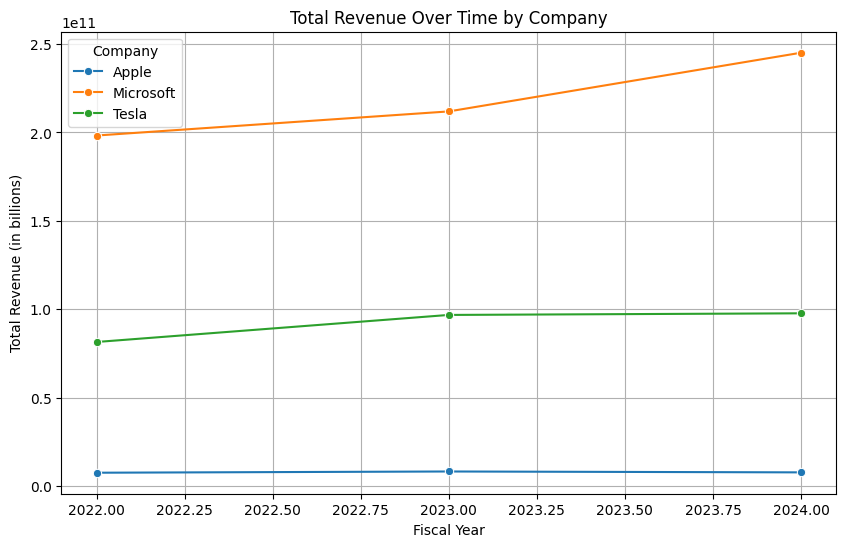

In [44]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Fiscal Year', y='Total Revenue', hue='Company', marker='o')
plt.title('Total Revenue Over Time by Company')
plt.ylabel('Total Revenue (in billions)')
plt.grid(True)
plt.show()

In [45]:
#Heatmap of average financial growth

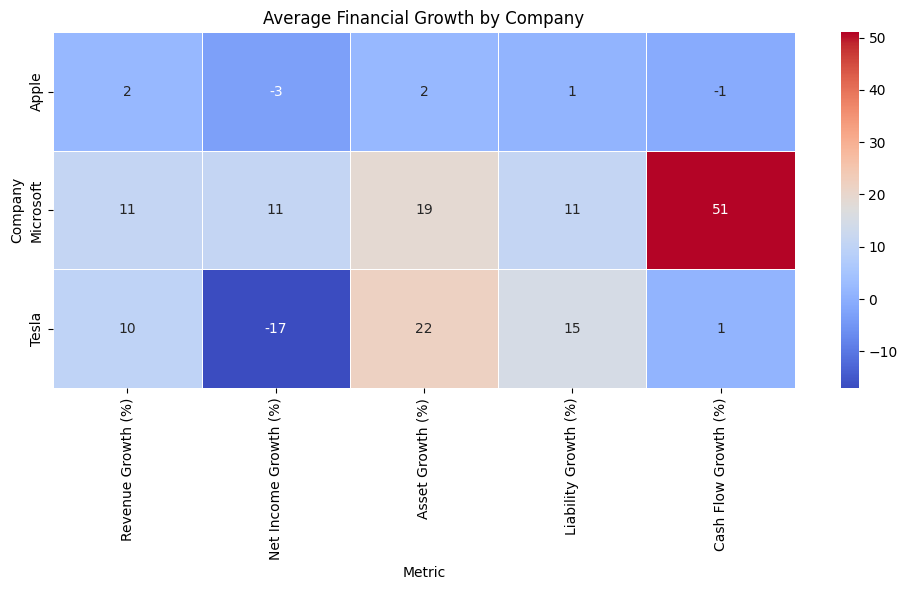

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(avg_growth, annot=True, cmap="coolwarm", linewidths=.5)

plt.title("Average Financial Growth by Company")
plt.ylabel("Company")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()

In [ ]:
METHODOLOGY
Data Collection:

Extracted key financial metrics from recent 10-K filings of Apple, Microsoft, and Tesla of years 2022, 2023 and 2024.

Key metrics include:
Revenue
Net Income
Total Assets
Total Liabilities
Operating Cash Flow

Calculated the year-over-year growth rates (%) for each metric.

Libraries Used:
pandas for data manipulation and analysis
matplotlib and seaborn for data visualization
Grouping and Aggregation: Analysis by grouping data by Company and in checking for the average growth rate for each financial metric.

In [ ]:
Observations
Microsoft shows consistent and robust growth across all metrics.

Tesla has rapid asset and liability growth, but seems to suffer from declining net income.
Tesla's revenue and assets are growing fast, in contrast to a -16.63% drop in Net Income.
In comparison with Microsoft and Apple, Tesla records high percentage asset and liability growth, but with a decline in net income.

Apple displays growth, especially in income and cash flow.
Apple is the top earner from the overall net income although its income is declining year over year.

In [ ]:
Conclusions

Microsoft with a seemingly lesser income than Apple demonstrates steady growth across all key financial metrics; revenue, net income, assets, liabilities, and cash flow from operating activities.
Tesla shows growth in assets and liabilities but sharp decline in net income .
Despite declining growth rates, Apple remains the top earner in net income year after year.